In [881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [883]:
managers_df = pd.read_csv('/Users/mcrandom/Downloads/managers (1).csv')
employees_df = pd.read_csv('/Users/mcrandom/Downloads/employees (1).csv')
jobs_df = pd.read_csv('/Users/mcrandom/Downloads/jobs (1).csv')
position_df = pd.read_csv('/Users/mcrandom/Downloads/positions (1).csv')

In [885]:
managers_df_copy = managers_df.copy()
employees_df_copy = employees_df.copy()
jobs_df_copy = jobs_df.copy()
position_df_copy = position_df.copy()

1. Handle duplicate data in job dataset:
a. In the job dataset, duplicate data is when you find rows with
the same job_title.

In [888]:
jobs_df_copy

,job_id,job_title,department
0,1,Front-End Developer,R&D
1,2,Back-End Developer,R&D
2,3,Full-Stack Developer,R&D
3,4,DevOps Engineer,R&D
4,5,UX Designer,Design
5,6,UI Designer,Design
6,7,Graphic Designer,Design
7,8,Web Designer,Design
8,9,Product Designer,Design
9,10,Product Manager,Product Management


In [889]:
duplicated_items = jobs_df_copy[jobs_df_copy.duplicated('job_title', keep=False)]
duplicated_items

,job_id,job_title,department
0,1,Front-End Developer,R&D
1,2,Back-End Developer,R&D
2,3,Full-Stack Developer,R&D
3,4,DevOps Engineer,R&D
4,5,UX Designer,Design
5,6,UI Designer,Design
6,7,Graphic Designer,Design
29,30,Front-End Developer,R&D
30,31,Back-End Developer,R&D
31,32,Full-Stack Developer,R&D


In [890]:
b. In case you find duplicate data, remove the job with less
information. Make sure you change associations in other
data sets to the duplicated job id so your data will still be
accurate.


SyntaxError: invalid syntax (1772053835.py, line 1)

In [891]:
jobs_id_map = {30: 1, 31: 2, 32: 3, 33:4, 34:5, 35:6, 36:7}


In [892]:
jobs_df_copy.set_index('job_id', inplace=True)

In [893]:
jobs_df_copy.drop(jobs_id_map.keys(), axis=0, inplace=True)

In [894]:
jobs_df_copy.reset_index('job_id', inplace=True) 

In [895]:
position_df_copy

,position_id,employee_id,job_id,position_location,starting_date,performance_score
0,1,331,17.0,Germany,2020-04-05,8.0
1,2,345,9.0,United States,2022-07-11,8.0
2,3,51,20.0,Spain,2023-10-19,8.0
3,4,430,21.0,Singapore,2023-03-26,7.0
4,5,127,36.0,Israel,2020-09-15,8.0
...,...,...,...,...,...,...
995,996,375,NaN,United Kingdom,2023-12-18,9.0
996,997,117,15.0,Argentina,2020-06-29,5.0
997,998,25,1.0,France,NaN,7.0
998,999,7,21.0,Argentina,2022-08-24,6.0


In [896]:
position_df_copy['job_id'] = position_df_copy['job_id'].replace(jobs_id_map)


In [897]:
position_df_copy[position_df_copy['job_id'] == 32]

,position_id,employee_id,job_id,position_location,starting_date,performance_score


#handle missing data
#manager data

In [899]:
managers_df_copy

,manager_id,first_name,last_name,email,age,gender,nationality,starting_date,years_of_experience,salary,performance_score
0,1,Tootsie,Collip,tcollip0@dailymotion.com,39.0,Female,Australia,2023-10-08,14.0,44194,7
1,2,Delano,Arnet,darnet1@phpbb.com,47.0,Male,Israel,2023-06-06,22.0,21201,6
2,3,Jakie,Sygrove,jsygrove2@goo.gl,59.0,Male,Japan,2023-11-05,26.0,32562,9
3,4,Gustavo,Schohier,gschohier3@mtv.com,59.0,Male,China,2021-10-15,NaN,47577,9
4,5,Martin,Smitherman,msmitherman4@businessweek.com,NaN,Agender,Germany,2020-07-03,28.0,35462,6
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ennis,Maidlow,emaidlow2n@yellowpages.com,38.0,Male,Spain,2022-09-02,22.0,52314,7
96,97,Dionne,Maudlin,dmaudlin2o@mlb.com,54.0,Female,Russia,2020-10-31,16.0,46955,8
97,98,Sawyer,Knightley,sknightley2p@constantcontact.com,47.0,Male,Japan,2023-10-29,11.0,22645,3
98,99,Burnard,Rubrow,brubrow2q@cafepress.com,33.0,Male,France,2023-03-30,12.0,23835,8


In [900]:
missing_data = managers_df_copy.isnull().sum()
total_rows = managers_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
manager_id,100,0,0.0
first_name,100,0,0.0
last_name,100,0,0.0
email,100,0,0.0
age,100,6,6.0
gender,100,13,13.0
nationality,100,0,0.0
starting_date,100,10,10.0
years_of_experience,100,5,5.0
salary,100,0,0.0


In [913]:
managers_df_copy['gender'] = managers_df_copy['gender'].fillna('Unknown')
managers_df_copy['age'] = managers_df_copy['age'].fillna(round(managers_df_copy['age'].mean()))
managers_df_copy['years_of_experience'] = managers_df_copy['years_of_experience'].fillna(round(managers_df_copy['years_of_experience'].mean()))##decided to put mean because if i was putting a placeholder like "Unknown" i would remove the fact that the column was int and couldnt do calculations. putting 0 would put incorect information and change mean calculation

In [914]:
managers_df_copy['starting_date'] = pd.to_datetime(managers_df_copy['starting_date'])

In [917]:
managers_df_copy['starting_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

/var/folders/n_/gjr5vm515r30lns9lx2wd0140000gn/T/ipykernel_25467/2461933815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  managers_df_copy['starting_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)


#employees data
employees_df_copy

In [920]:
missing_data = employees_df_copy.isnull().sum()
total_rows = employees_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
employee_id,500,0,0.0
manager_id,500,31,6.2
first_name,500,0,0.0
last_name,500,0,0.0
email,500,0,0.0
age,500,42,8.4
gender,500,37,7.4
nationality,500,0,0.0
years_of_experience,500,28,5.6
salary,500,17,3.4


In [922]:
employees_df_copy.dropna(subset=['manager_id'], inplace=True)
employees_df_copy.dropna(subset=['salary'], inplace=True)
employees_df_copy['gender'] = employees_df_copy['gender'].fillna('Unknown')
employees_df_copy['age'] = employees_df_copy['age'].fillna(round(employees_df_copy['age'].mean()))
employees_df_copy['years_of_experience'] = employees_df_copy['years_of_experience'].fillna(round(employees_df_copy['years_of_experience'].mean()))##same reason as before

#jobs missing data

In [925]:
jobs_df_copy

,job_id,job_title,department
0,1,Front-End Developer,R&D
1,2,Back-End Developer,R&D
2,3,Full-Stack Developer,R&D
3,4,DevOps Engineer,R&D
4,5,UX Designer,Design
5,6,UI Designer,Design
6,7,Graphic Designer,Design
7,8,Web Designer,Design
8,9,Product Designer,Design
9,10,Product Manager,Product Management


In [927]:
missing_data = jobs_df_copy.isnull().sum()
total_rows = jobs_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
job_id,29,0,0.0
job_title,29,0,0.0
department,29,0,0.0


no missing data found. yippie

#position missing data

In [931]:
position_df_copy

,position_id,employee_id,job_id,position_location,starting_date,performance_score
0,1,331,17.0,Germany,2020-04-05,8.0
1,2,345,9.0,United States,2022-07-11,8.0
2,3,51,20.0,Spain,2023-10-19,8.0
3,4,430,21.0,Singapore,2023-03-26,7.0
4,5,127,7.0,Israel,2020-09-15,8.0
...,...,...,...,...,...,...
995,996,375,NaN,United Kingdom,2023-12-18,9.0
996,997,117,15.0,Argentina,2020-06-29,5.0
997,998,25,1.0,France,NaN,7.0
998,999,7,21.0,Argentina,2022-08-24,6.0


In [933]:
missing_data = position_df_copy.isnull().sum()
total_rows = position_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
position_id,1000,0,0.0
employee_id,1000,0,0.0
job_id,1000,34,3.4
position_location,1000,0,0.0
starting_date,1000,109,10.9
performance_score,1000,100,10.0


In [935]:
position_df_copy.dropna(subset=['job_id'], inplace=True)


In [937]:
position_df_copy['starting_date'] = pd.to_datetime(position_df_copy['starting_date'])

In [939]:
position_df_copy['starting_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

/var/folders/n_/gjr5vm515r30lns9lx2wd0140000gn/T/ipykernel_25467/3005972677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  position_df_copy['starting_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)


In [941]:
position_df_copy.dropna(subset=['performance_score'], inplace=True)#performence score is mandatory because that is the main thing we want to keep track of an employee at a specific job

data analyst - employees_df_copy
1. Explore the employees.csv dataset and answer the following
questions, base your answers with data calculations and
visualizations if needed:
a. Count the number of employees by nationality, show a
dataframe with each nationality and how many employees
we have from that country.
Plot bar chart to visualize your result.

In [944]:
employees_df_copy

,employee_id,manager_id,first_name,last_name,email,age,gender,nationality,years_of_experience,salary
1,2,80.0,Chastity,MacHostie,cmachostie1@nytimes.com,63.0,Female,Germany,13.0,21968.0
2,3,3.0,Rayna,Stemson,rstemson2@opensource.org,27.0,Unknown,Japan,12.0,28725.0
3,4,94.0,Forest,Dillway,fdillway3@myspace.com,45.0,Male,Japan,8.0,29375.0
4,5,25.0,Kristel,Mooreed,kmooreed4@thetimes.co.uk,24.0,Female,France,10.0,21709.0
6,7,25.0,Karla,Searston,ksearston6@wiley.com,30.0,Unknown,Spain,12.0,31199.0
...,...,...,...,...,...,...,...,...,...,...
495,496,11.0,Ezri,Ipwell,eipwelldr@github.com,57.0,Male,Israel,7.0,18306.0
496,497,90.0,Demetris,Hoggins,dhogginsds@ucoz.ru,41.0,Female,China,8.0,15884.0
497,498,83.0,Selena,Pedican,spedicandt@homestead.com,60.0,Female,Italy,5.0,13687.0
498,499,49.0,Freddie,Attenborrow,fattenborrowdu@wisc.edu,50.0,Unknown,Australia,9.0,16985.0


In [946]:
employee_nationality_count = employees_df_copy.groupby('nationality ').size().reset_index(name='nationality_count')
employee_nationality_count

,nationality,nationality_count
0,Australia,20
1,Brazil,20
2,Canada,17
3,China,22
4,France,20
5,Germany,68
6,India,15
7,Israel,55
8,Italy,18
9,Japan,28


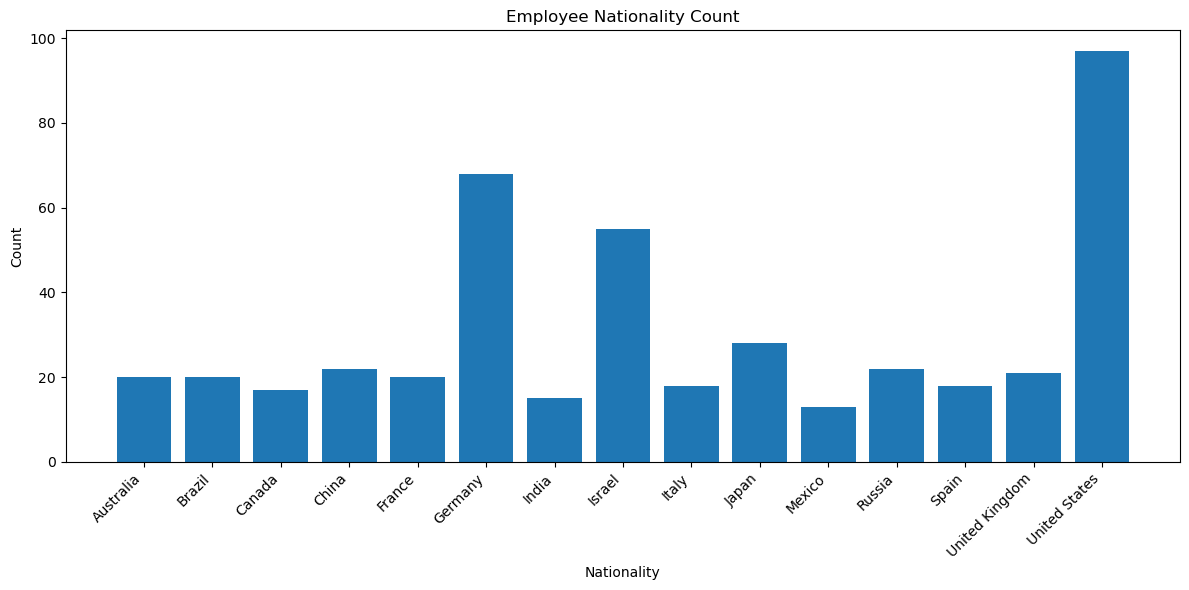

In [948]:
plt.figure(figsize=(12,6))
plt.bar(employee_nationality_count['nationality '], employee_nationality_count['nationality_count'])
plt.title('Employee Nationality Count')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

b. Plot the employee age distribution with histogram chart.

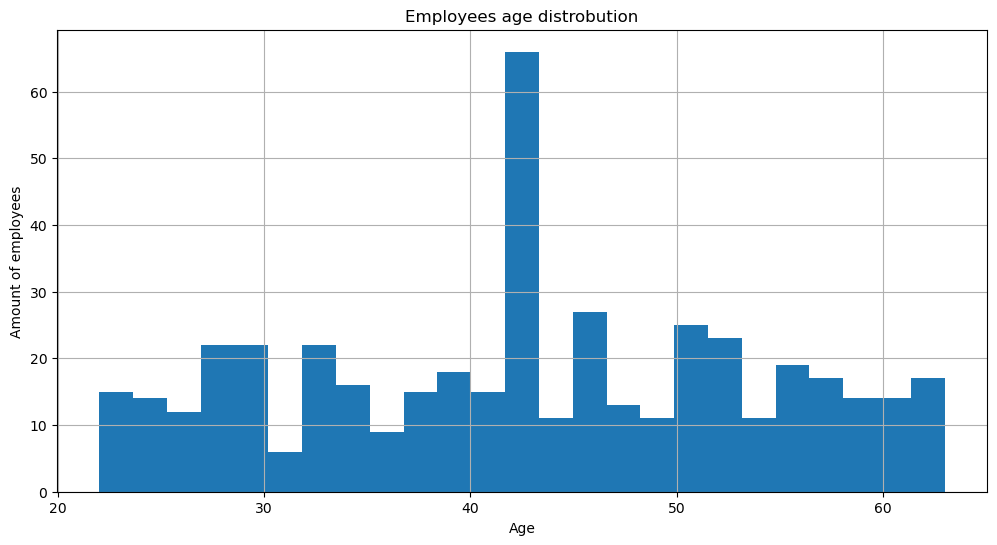

In [951]:
plt.figure(figsize=(12,6))
plt.hist(employees_df_copy['age'], bins=25)
plt.title('Employees age distrobution')
plt.xlabel('Age')
plt.ylabel('Amount of employees')
plt.grid()
plt.show()

c. Create a dataframe containing the top 3 employees that
have the highest salary and the top 3 employees that have
the lowest salary.
In your dataframe show the employee id, first name, last
name, age, years of experience and salary.

In [954]:
top_employees = employees_df_copy[['employee_id','first_name','last_name','age','years_of_experience','salary']].sort_values(by='salary', ascending=False).head(3)
top_employees
bottom_employees =  employees_df_copy[['employee_id','first_name','last_name','age','years_of_experience','salary']].sort_values(by='salary', ascending=True).head(3)
bottom_employees

,employee_id,first_name,last_name,age,years_of_experience,salary
312,313,Dorena,Leyband,37.0,12.0,9002.0
450,451,Kamillah,Scrimgeour,43.0,7.0,9070.0
63,64,Marley,Greedy,32.0,6.0,9119.0


d. Examine if there is a correlation between the employee years
of experience and the employee salary.
Base your answer on a chart at your choice.

In [957]:
exprience_vs_salary = employees_df_copy[['years_of_experience','salary']]
exprience_vs_salary

,years_of_experience,salary
1,13.0,21968.0
2,12.0,28725.0
3,8.0,29375.0
4,10.0,21709.0
6,12.0,31199.0
...,...,...
495,7.0,18306.0
496,8.0,15884.0
497,5.0,13687.0
498,9.0,16985.0


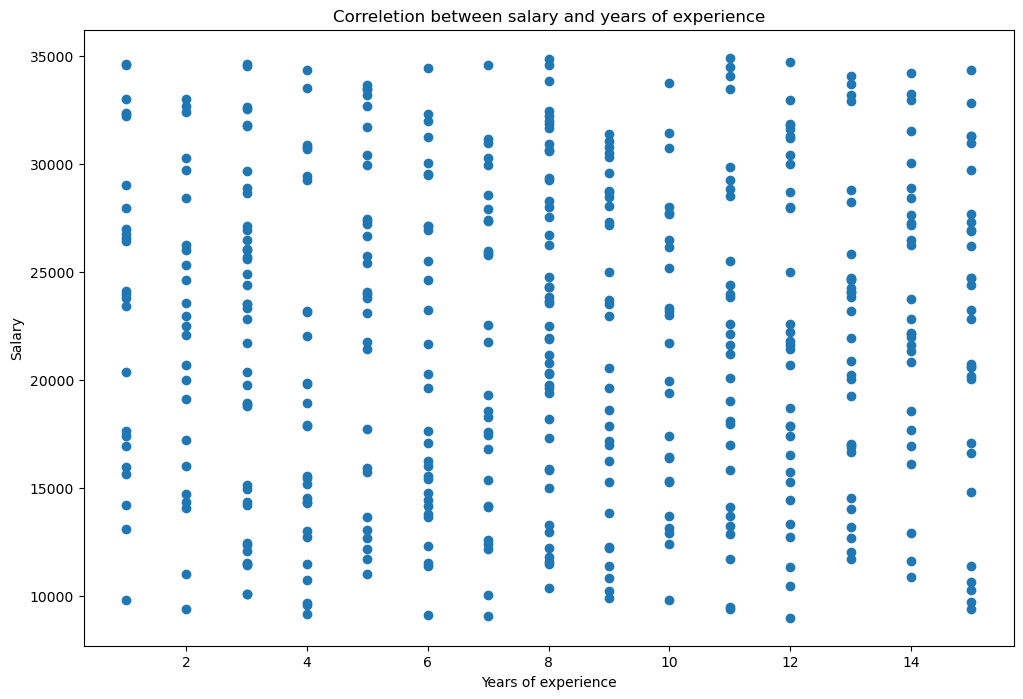

In [959]:
plt.figure(figsize=(12,8))
plt.scatter(exprience_vs_salary['years_of_experience'], exprience_vs_salary['salary'])
plt.title('Correletion between salary and years of experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.tight_layout
plt.show()

No correlation was found between years of experience and salary. alot of new juniors earn low and high salary, the same goes for seniors.

2. Explore the managers.csv dataset and answer the following
questions, base your answers with data calculations and
visualizations if needed:
a. Count the number of managers by performance score
Your chart should show the following score labels:
i. For score between 1 - 5 → ‘Low Performance’
ii. For score between 6 - 7 → ‘Medium Performance’
iii. For score between 8 - 10 → ‘High Performance’
Plot bar chart to visualize your result.

In [963]:
managers_df_copy

,manager_id,first_name,last_name,email,age,gender,nationality,starting_date,years_of_experience,salary,performance_score
0,1,Tootsie,Collip,tcollip0@dailymotion.com,39.0,Female,Australia,2023-10-08,14.0,44194,7
1,2,Delano,Arnet,darnet1@phpbb.com,47.0,Male,Israel,2023-06-06,22.0,21201,6
2,3,Jakie,Sygrove,jsygrove2@goo.gl,59.0,Male,Japan,2023-11-05,26.0,32562,9
3,4,Gustavo,Schohier,gschohier3@mtv.com,59.0,Male,China,2021-10-15,16.0,47577,9
4,5,Martin,Smitherman,msmitherman4@businessweek.com,46.0,Agender,Germany,2020-07-03,28.0,35462,6
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ennis,Maidlow,emaidlow2n@yellowpages.com,38.0,Male,Spain,2022-09-02,22.0,52314,7
96,97,Dionne,Maudlin,dmaudlin2o@mlb.com,54.0,Female,Russia,2020-10-31,16.0,46955,8
97,98,Sawyer,Knightley,sknightley2p@constantcontact.com,47.0,Male,Japan,2023-10-29,11.0,22645,3
98,99,Burnard,Rubrow,brubrow2q@cafepress.com,33.0,Male,France,2023-03-30,12.0,23835,8


In [965]:
def performence_check(performence):
    if 1 <= performence <= 5:
        return 'Low'
    elif 6 <= performence <= 7:
        return 'Medium'
    elif 8 <= performence <= 10:
        return 'High'
    else:
        return 'Unknown'

managers_df_copy['performance_type'] = managers_df_copy['performance_score'].apply(performence_check)
performance_summary_df = managers_df_copy['performance_type'].value_counts().reindex(['Low', 'Medium', 'High'], fill_value=0).reset_index()
performance_summary_df

,performance_type,count
0,Low,14
1,Medium,50
2,High,36


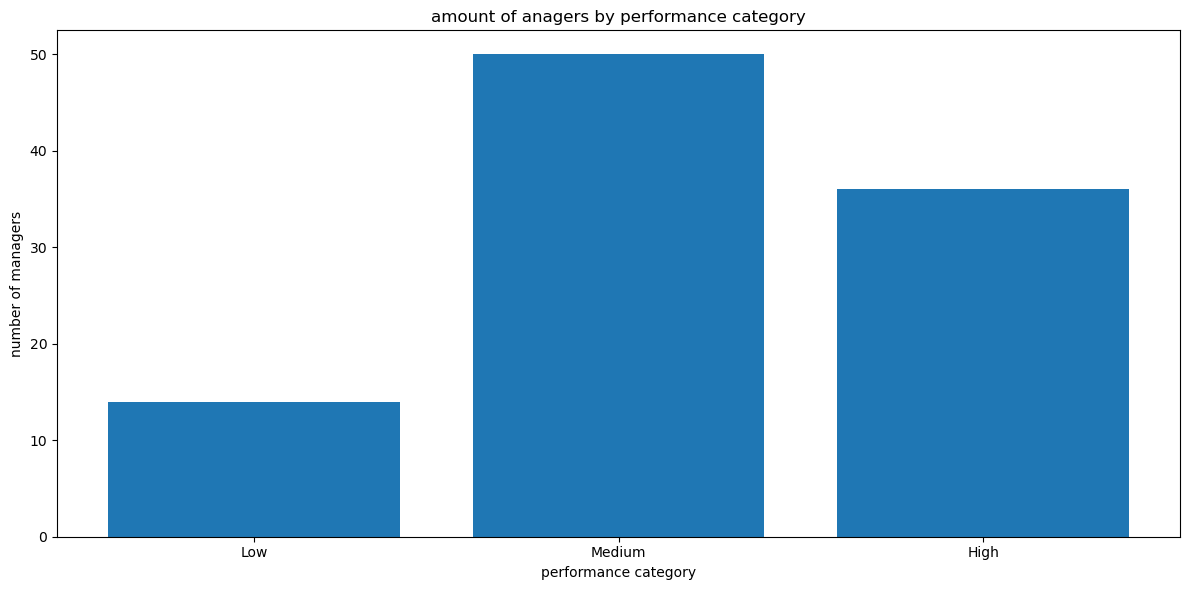

In [967]:
plt.figure(figsize=(12, 6))
plt.bar(performance_summary_df['performance_type'], performance_summary_df['count'])
plt.title('amount of anagers by performance category')
plt.xlabel('performance category')
plt.ylabel('number of managers')
plt.tight_layout()
plt.show()

b. Examine whether there's a prevailing trend in managers
joining the company over the timeframe from 2020 to 2024.
Has there been a consistent increase or decrease in the
number of managers joining over the years, or does the data
suggest a more sporadic or unpredictable pattern?

In [970]:
managers_df_copy

,manager_id,first_name,last_name,email,age,gender,nationality,starting_date,years_of_experience,salary,performance_score,performance_type
0,1,Tootsie,Collip,tcollip0@dailymotion.com,39.0,Female,Australia,2023-10-08,14.0,44194,7,Medium
1,2,Delano,Arnet,darnet1@phpbb.com,47.0,Male,Israel,2023-06-06,22.0,21201,6,Medium
2,3,Jakie,Sygrove,jsygrove2@goo.gl,59.0,Male,Japan,2023-11-05,26.0,32562,9,High
3,4,Gustavo,Schohier,gschohier3@mtv.com,59.0,Male,China,2021-10-15,16.0,47577,9,High
4,5,Martin,Smitherman,msmitherman4@businessweek.com,46.0,Agender,Germany,2020-07-03,28.0,35462,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ennis,Maidlow,emaidlow2n@yellowpages.com,38.0,Male,Spain,2022-09-02,22.0,52314,7,Medium
96,97,Dionne,Maudlin,dmaudlin2o@mlb.com,54.0,Female,Russia,2020-10-31,16.0,46955,8,High
97,98,Sawyer,Knightley,sknightley2p@constantcontact.com,47.0,Male,Japan,2023-10-29,11.0,22645,3,Low
98,99,Burnard,Rubrow,brubrow2q@cafepress.com,33.0,Male,France,2023-03-30,12.0,23835,8,High


In [972]:
filtered_managers_df = managers_df_copy[managers_df_copy['starting_date'] != pd.to_datetime('1970-01-01')]
filtered_managers_df 

,manager_id,first_name,last_name,email,age,gender,nationality,starting_date,years_of_experience,salary,performance_score,performance_type
0,1,Tootsie,Collip,tcollip0@dailymotion.com,39.0,Female,Australia,2023-10-08,14.0,44194,7,Medium
1,2,Delano,Arnet,darnet1@phpbb.com,47.0,Male,Israel,2023-06-06,22.0,21201,6,Medium
2,3,Jakie,Sygrove,jsygrove2@goo.gl,59.0,Male,Japan,2023-11-05,26.0,32562,9,High
3,4,Gustavo,Schohier,gschohier3@mtv.com,59.0,Male,China,2021-10-15,16.0,47577,9,High
4,5,Martin,Smitherman,msmitherman4@businessweek.com,46.0,Agender,Germany,2020-07-03,28.0,35462,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ennis,Maidlow,emaidlow2n@yellowpages.com,38.0,Male,Spain,2022-09-02,22.0,52314,7,Medium
96,97,Dionne,Maudlin,dmaudlin2o@mlb.com,54.0,Female,Russia,2020-10-31,16.0,46955,8,High
97,98,Sawyer,Knightley,sknightley2p@constantcontact.com,47.0,Male,Japan,2023-10-29,11.0,22645,3,Low
98,99,Burnard,Rubrow,brubrow2q@cafepress.com,33.0,Male,France,2023-03-30,12.0,23835,8,High


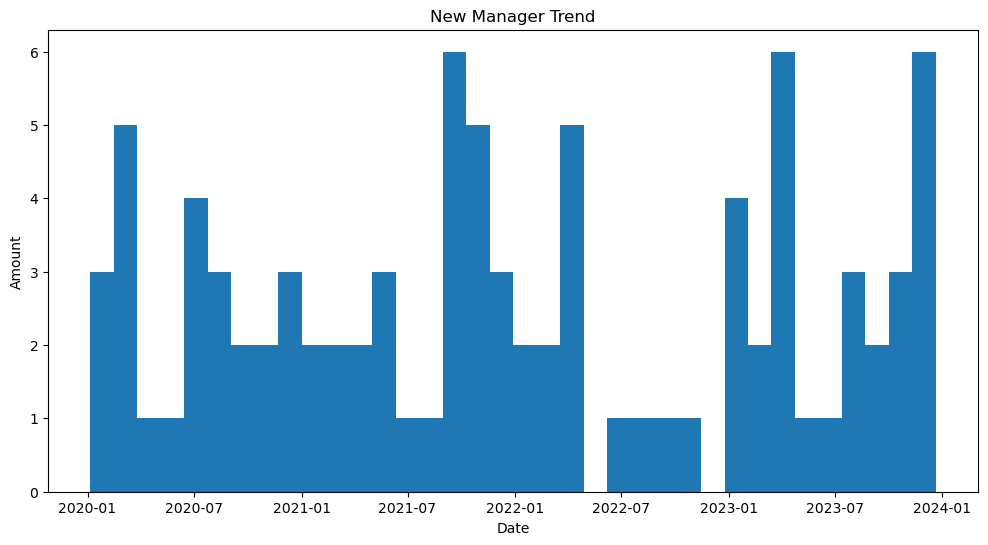

In [974]:
plt.figure(figsize=(12,6))
plt.hist(filtered_managers_df['starting_date'], bins=36)
plt.title('New Manager Trend')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

According to the data, we can see a decrease in late 2022 from the start of the year, yet a spike in mid and late 2023 towards 2024.
We can see that around the area of the start and the end of the year, we see more managers joining in.

c. Calculate for each location what is the mean salary of all
managers from this nationality.
Do you see that the company is paying more to managers in
specific locations than others?

In [978]:
managers_df_copy.groupby('nationality')['salary'].mean().reset_index(name='total_salary').sort_values(by='total_salary', ascending=False)

,nationality,total_salary
7,Israel,40927.666667
6,India,38523.200000
10,Mexico,38330.600000
14,United States,37414.200000
5,Germany,36665.560000
11,Russia,35888.000000
12,Spain,34412.666667
8,Italy,34363.125000
4,France,32902.000000
1,Brazil,32366.333333


The data suggets the company does pay more per country. for example, we can clearly see the avrage salary the company pays in israel is around 41000ILS. while in countries like UK and Canada, it almost half the salary at around 22000ILS.

d. For all managers only hired from 01/01/2022 and above,
what is the mean amount of employees those managers are
managing?

In [982]:
managers_df_copy

,manager_id,first_name,last_name,email,age,gender,nationality,starting_date,years_of_experience,salary,performance_score,performance_type
0,1,Tootsie,Collip,tcollip0@dailymotion.com,39.0,Female,Australia,2023-10-08,14.0,44194,7,Medium
1,2,Delano,Arnet,darnet1@phpbb.com,47.0,Male,Israel,2023-06-06,22.0,21201,6,Medium
2,3,Jakie,Sygrove,jsygrove2@goo.gl,59.0,Male,Japan,2023-11-05,26.0,32562,9,High
3,4,Gustavo,Schohier,gschohier3@mtv.com,59.0,Male,China,2021-10-15,16.0,47577,9,High
4,5,Martin,Smitherman,msmitherman4@businessweek.com,46.0,Agender,Germany,2020-07-03,28.0,35462,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ennis,Maidlow,emaidlow2n@yellowpages.com,38.0,Male,Spain,2022-09-02,22.0,52314,7,Medium
96,97,Dionne,Maudlin,dmaudlin2o@mlb.com,54.0,Female,Russia,2020-10-31,16.0,46955,8,High
97,98,Sawyer,Knightley,sknightley2p@constantcontact.com,47.0,Male,Japan,2023-10-29,11.0,22645,3,Low
98,99,Burnard,Rubrow,brubrow2q@cafepress.com,33.0,Male,France,2023-03-30,12.0,23835,8,High


In [984]:
recent_managers = managers_df_copy[managers_df_copy['starting_date'] >= '2022-01-01']
recent_managers

,manager_id,first_name,last_name,email,age,gender,nationality,starting_date,years_of_experience,salary,performance_score,performance_type
0,1,Tootsie,Collip,tcollip0@dailymotion.com,39.0,Female,Australia,2023-10-08,14.0,44194,7,Medium
1,2,Delano,Arnet,darnet1@phpbb.com,47.0,Male,Israel,2023-06-06,22.0,21201,6,Medium
2,3,Jakie,Sygrove,jsygrove2@goo.gl,59.0,Male,Japan,2023-11-05,26.0,32562,9,High
7,8,Gregoor,Coope,gcoope7@xing.com,58.0,Male,France,2022-02-15,11.0,40720,7,Medium
10,11,Chloette,Palfreman,cpalfremana@cisco.com,60.0,Female,Germany,2023-11-25,11.0,37152,8,High
14,15,Berty,Bruneau,bbruneaue@upenn.edu,46.0,Unknown,United States,2022-03-30,7.0,51423,6,Medium
15,16,Bobbe,Culshaw,bculshawf@yandex.ru,35.0,Female,Mexico,2023-12-21,12.0,54182,7,Medium
16,17,Meggy,Atley,matleyg@csmonitor.com,45.0,Bigender,Australia,2022-07-23,14.0,22847,2,Low
19,20,Zora,Folca,zfolcaj@goodreads.com,47.0,Female,Japan,2022-04-18,29.0,23580,6,Medium
20,21,Fredrick,Evreux,fevreuxk@usa.gov,49.0,Unknown,United States,2023-04-02,6.0,36581,9,High


In [986]:
employee_counts = employees_df_copy['manager_id'].value_counts().reset_index(name='count')
employee_counts

,manager_id,count
0,77.0,11
1,79.0,9
2,18.0,9
3,66.0,9
4,35.0,8
...,...,...
94,34.0,1
95,26.0,1
96,37.0,1
97,89.0,1


In [988]:
recent_employee_counts = employee_counts[employee_counts['manager_id'].isin(recent_managers['manager_id'])]
mean_managed = employee_counts[employee_counts['manager_id'].isin(recent_managers['manager_id'])]
mean_managed

,manager_id,count
4,35.0,8
9,96.0,7
10,17.0,7
14,88.0,7
17,20.0,7
19,3.0,6
20,53.0,6
27,86.0,6
31,32.0,5
33,90.0,5


In [990]:
print(f" The mean amount of employees, managers hired from 1/1/2022 are managing is {mean_managed['count'].mean()}")

 The mean amount of employees, managers hired from 1/1/2022 are managing is 3.9


e. Examine if there is a correlation between the manager
number of employees he manages and his salary.
Base your answer on a chart at your choice.

In [993]:
managing_vs_salary = managers_df_copy.merge(mean_managed, on='manager_id', how='left')
managing_vs_salary['count'].mean()

3.9

In [995]:
managing_vs_salary = managing_vs_salary[['salary','count']]


In [997]:
managing_vs_salary['count'] = managing_vs_salary['count'].fillna(0.0)


In [999]:
managing_vs_salary

,salary,count
0,44194,3.0
1,21201,4.0
2,32562,6.0
3,47577,0.0
4,35462,0.0
...,...,...
95,52314,7.0
96,46955,0.0
97,22645,4.0
98,23835,3.0


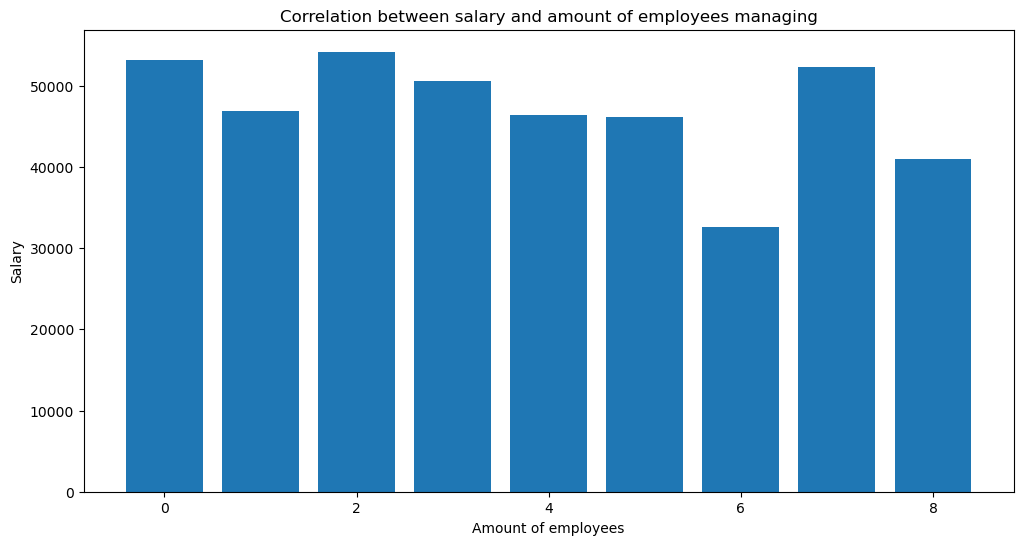

In [1001]:

plt.figure(figsize=(12, 6))
plt.bar(managing_vs_salary['count'], managing_vs_salary['salary'])
plt.title('Correlation between salary and amount of employees managing')
plt.xlabel('Amount of employees')
plt.ylabel('Salary')

plt.show()

There is no specific correlation. Managers managing small amount of employees do not earn less than managers managin big amount of employees. Its interestig to see that it might be the opposite with Managers managing small amount of people actually earn a bit more.

a. Count the number of jobs by department, show a dataframe
with each department and how many jobs belong to that
department.
Plot bar chart to visualize your result.

In [1005]:
jobs_by_department = jobs_df_copy
jobs_by_department = jobs_by_department.groupby('department')['job_title'].count().reset_index(name='number_of_jobs')

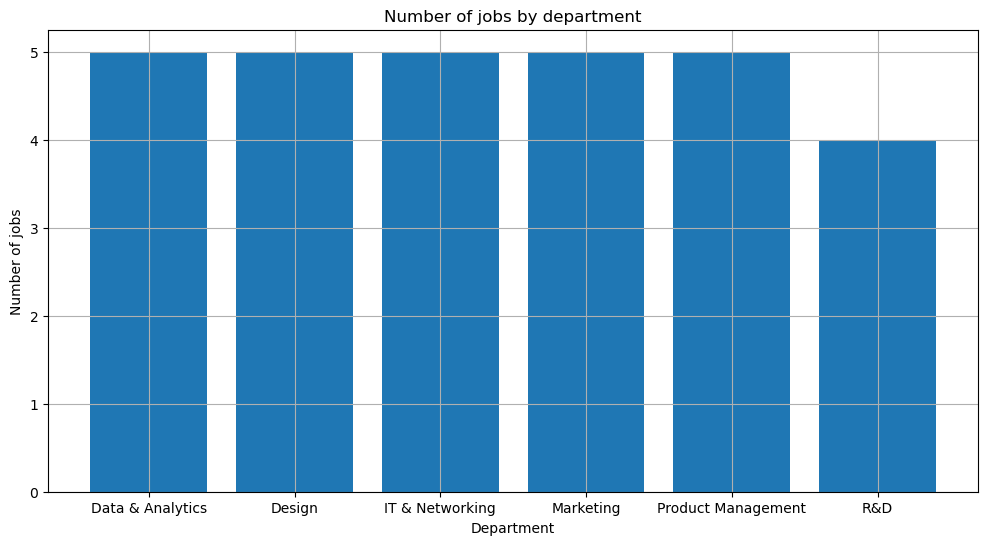

In [1007]:
plt.figure(figsize=(12, 6))
plt.bar(jobs_by_department['department'], jobs_by_department['number_of_jobs'])
plt.title('Number of jobs by department')
plt.xlabel('Department')
plt.ylabel('Number of jobs')
plt.grid()
plt.show()

a. Calculate how many employees have 0, 1, 2, 3… and more
positions.
Plot a bar chart for each position amount and show how
many employees the company has for each category.

In [1010]:
employees_df_copy

,employee_id,manager_id,first_name,last_name,email,age,gender,nationality,years_of_experience,salary
1,2,80.0,Chastity,MacHostie,cmachostie1@nytimes.com,63.0,Female,Germany,13.0,21968.0
2,3,3.0,Rayna,Stemson,rstemson2@opensource.org,27.0,Unknown,Japan,12.0,28725.0
3,4,94.0,Forest,Dillway,fdillway3@myspace.com,45.0,Male,Japan,8.0,29375.0
4,5,25.0,Kristel,Mooreed,kmooreed4@thetimes.co.uk,24.0,Female,France,10.0,21709.0
6,7,25.0,Karla,Searston,ksearston6@wiley.com,30.0,Unknown,Spain,12.0,31199.0
...,...,...,...,...,...,...,...,...,...,...
495,496,11.0,Ezri,Ipwell,eipwelldr@github.com,57.0,Male,Israel,7.0,18306.0
496,497,90.0,Demetris,Hoggins,dhogginsds@ucoz.ru,41.0,Female,China,8.0,15884.0
497,498,83.0,Selena,Pedican,spedicandt@homestead.com,60.0,Female,Italy,5.0,13687.0
498,499,49.0,Freddie,Attenborrow,fattenborrowdu@wisc.edu,50.0,Unknown,Australia,9.0,16985.0


In [1012]:
position_df_copy

,position_id,employee_id,job_id,position_location,starting_date,performance_score
0,1,331,17.0,Germany,2020-04-05,8.0
1,2,345,9.0,United States,2022-07-11,8.0
2,3,51,20.0,Spain,2023-10-19,8.0
3,4,430,21.0,Singapore,2023-03-26,7.0
4,5,127,7.0,Israel,2020-09-15,8.0
...,...,...,...,...,...,...
994,995,493,22.0,United States,1970-01-01,7.0
996,997,117,15.0,Argentina,2020-06-29,5.0
997,998,25,1.0,France,1970-01-01,7.0
998,999,7,21.0,Argentina,2022-08-24,6.0


In [1013]:
position_counts = position_df_copy['employee_id'].value_counts().reset_index(name='position_count')
#position_countss = position_counts.groupby('position_count')['employee_id'].size()
#position_countss

In [1014]:
all_employees = employees_df_copy[['employee_id']]
position_counts = all_employees.merge(position_counts, on='employee_id', how='left')
position_counts = position_counts.fillna(0)
position_counts['position_count'] = position_counts['position_count'].astype(int)
position_distribution = position_counts['position_count'].value_counts().sort_index().reset_index(name='employee_count')
position_distribution

,position_count,employee_count
0,0,84
1,1,125
2,2,141
3,3,67
4,4,25
5,5,9
6,6,2
7,7,1


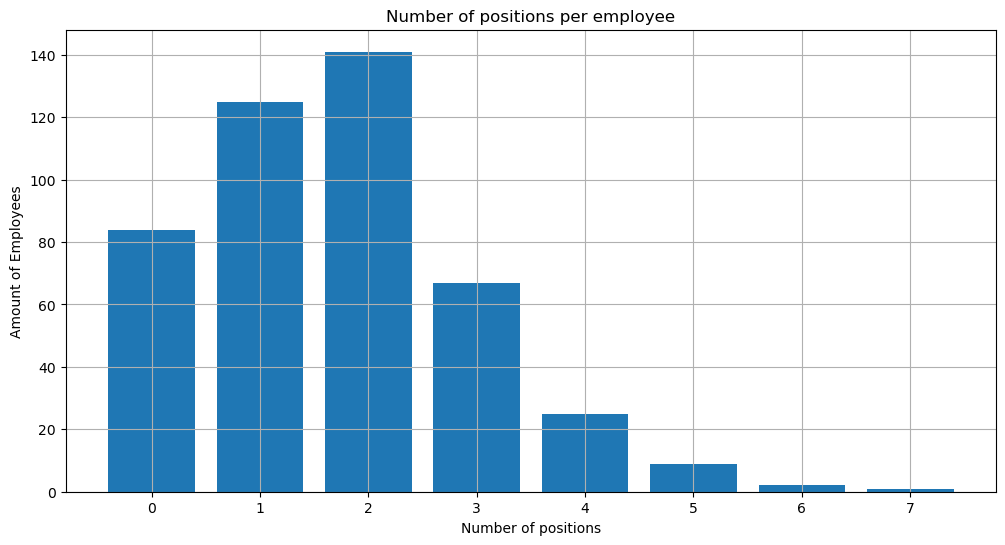

In [1015]:
plt.figure(figsize=(12, 6))
plt.bar(position_distribution['position_count'], position_distribution['employee_count'])
plt.title('Number of positions per employee')
plt.xlabel('Number of positions')
plt.ylabel('Amount of Employees')
plt.grid()
plt.show()

b. Calculate how many employees are working in positions that
are different from their nationality. For example, an employee
that works in the USA but he is from Brazil.

In [1017]:
employee_nationality = employees_df_copy[['employee_id', 'nationality ']]
employee_nationality

,employee_id,nationality
1,2,Germany
2,3,Japan
3,4,Japan
4,5,France
6,7,Spain
...,...,...
495,496,Israel
496,497,China
497,498,Italy
498,499,Australia


In [1023]:
employee_nationality = employee_nationality.merge(position_df_copy[['employee_id','position_location']], on='employee_id', how='inner')
employee_nationality

,employee_id,nationality,position_location
0,2,Germany,Sweden
1,2,Germany,United States
2,3,Japan,Canada
3,4,Japan,Italy
4,5,France,Israel
...,...,...,...
767,498,Italy,France
768,498,Italy,Canada
769,499,Australia,Canada
770,499,Australia,United States


In [1025]:
employee_nationality['different_country'] = employee_nationality['nationality '] != employee_nationality['position_location']
employee_nationality

,employee_id,nationality,position_location,different_country
0,2,Germany,Sweden,True
1,2,Germany,United States,True
2,3,Japan,Canada,True
3,4,Japan,Italy,True
4,5,France,Israel,True
...,...,...,...,...
767,498,Italy,France,True
768,498,Italy,Canada,True
769,499,Australia,Canada,True
770,499,Australia,United States,True


In [1027]:
different_country_rows = employee_nationality[employee_nationality['different_country']]
unique_employees_diff_country = different_country_rows['employee_id'].nunique()
unique_employees_diff_country

359

In [1029]:
print(f"number of employees working in a different country than their nationaity: {unique_employees_diff_country}")

number of employees working in a different country than their nationaity: 359


c. Add a new column to the employee.csv dataset called
‘mean_performance_score’. This new column should contain
the mean performance score for each employee according to
all its positions.

In [1032]:
employees_df_copy

,employee_id,manager_id,first_name,last_name,email,age,gender,nationality,years_of_experience,salary
1,2,80.0,Chastity,MacHostie,cmachostie1@nytimes.com,63.0,Female,Germany,13.0,21968.0
2,3,3.0,Rayna,Stemson,rstemson2@opensource.org,27.0,Unknown,Japan,12.0,28725.0
3,4,94.0,Forest,Dillway,fdillway3@myspace.com,45.0,Male,Japan,8.0,29375.0
4,5,25.0,Kristel,Mooreed,kmooreed4@thetimes.co.uk,24.0,Female,France,10.0,21709.0
6,7,25.0,Karla,Searston,ksearston6@wiley.com,30.0,Unknown,Spain,12.0,31199.0
...,...,...,...,...,...,...,...,...,...,...
495,496,11.0,Ezri,Ipwell,eipwelldr@github.com,57.0,Male,Israel,7.0,18306.0
496,497,90.0,Demetris,Hoggins,dhogginsds@ucoz.ru,41.0,Female,China,8.0,15884.0
497,498,83.0,Selena,Pedican,spedicandt@homestead.com,60.0,Female,Italy,5.0,13687.0
498,499,49.0,Freddie,Attenborrow,fattenborrowdu@wisc.edu,50.0,Unknown,Australia,9.0,16985.0


In [1034]:
mean_scores_employees = position_df_copy.groupby('employee_id')['performance_score'].mean().reset_index()
mean_scores_employees.columns = ['employee_id', 'mean_performance_score']
employees_df_copy = employees_df_copy.merge(mean_scores_employees, on='employee_id', how='left')
employees_df_copy

,employee_id,manager_id,first_name,last_name,email,age,gender,nationality,years_of_experience,salary,mean_performance_score
0,2,80.0,Chastity,MacHostie,cmachostie1@nytimes.com,63.0,Female,Germany,13.0,21968.0,7.5
1,3,3.0,Rayna,Stemson,rstemson2@opensource.org,27.0,Unknown,Japan,12.0,28725.0,7.0
2,4,94.0,Forest,Dillway,fdillway3@myspace.com,45.0,Male,Japan,8.0,29375.0,8.0
3,5,25.0,Kristel,Mooreed,kmooreed4@thetimes.co.uk,24.0,Female,France,10.0,21709.0,8.0
4,7,25.0,Karla,Searston,ksearston6@wiley.com,30.0,Unknown,Spain,12.0,31199.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
449,496,11.0,Ezri,Ipwell,eipwelldr@github.com,57.0,Male,Israel,7.0,18306.0,10.0
450,497,90.0,Demetris,Hoggins,dhogginsds@ucoz.ru,41.0,Female,China,8.0,15884.0,NaN
451,498,83.0,Selena,Pedican,spedicandt@homestead.com,60.0,Female,Italy,5.0,13687.0,5.0
452,499,49.0,Freddie,Attenborrow,fattenborrowdu@wisc.edu,50.0,Unknown,Australia,9.0,16985.0,4.5


d. Use the ‘mean_performance_score’ new column you
calculated in the previous exercise and see if there is a
correlation between the mean performance score of the
employee and the performance score of its manager.
Base your answer on a chart at your choice.

In [1041]:
perfomence_manager_employee = employees_df_copy[['employee_id','manager_id','mean_performance_score']].merge(managers_df_copy[['manager_id','performance_score']], on='manager_id', how='inner')
perfomence_manager_employee

,employee_id,manager_id,mean_performance_score,performance_score
0,2,80.0,7.5,6
1,3,3.0,7.0,9
2,4,94.0,8.0,4
3,5,25.0,8.0,6
4,7,25.0,7.0,6
...,...,...,...,...
449,496,11.0,10.0,8
450,497,90.0,NaN,6
451,498,83.0,5.0,9
452,499,49.0,4.5,1


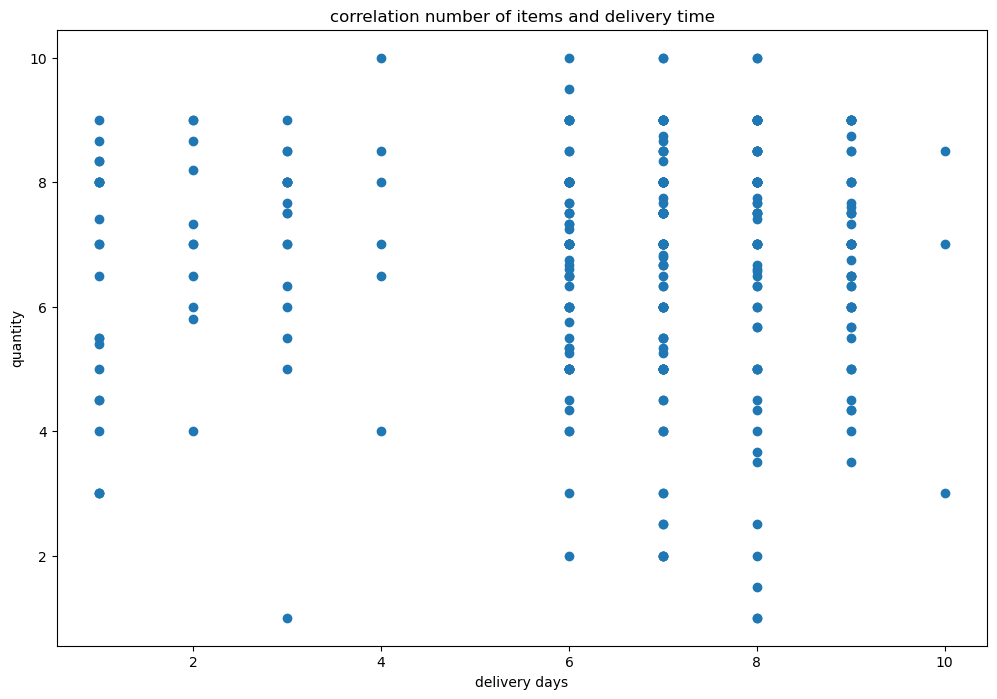

In [1043]:
plt.figure(figsize=(12,8))
plt.scatter(perfomence_manager_employee['performance_score'], perfomence_manager_employee['mean_performance_score'])
plt.title('Performence of Manager Vs Employee')
plt.xlabel('Manager Performence')
plt.ylabel('Employee Performence')
plt.show()

The data does not show correlation between the score of the manager and the mean score of the employee.

e. Find what are the top 3 departments that pay their employees the highest salaries. Show your calculations in the result and generate a new dataframe containing the top 3 departments.
For each department, show in the dataframe the department
name, amount of employees, total salary amount.

In [1062]:
emp_pos = position_df_copy.merge(employees_df_copy[['employee_id', 'salary']], on='employee_id', how='left')
emp_pos
emp_pos_jobs = emp_pos.merge(jobs_df_copy[['job_id', 'department']], on='job_id', how='left')
emp_pos_jobs

,position_id,employee_id,job_id,position_location,starting_date,performance_score,salary,department
0,1,331,17.0,Germany,2020-04-05,8.0,17401.0,IT & Networking
1,2,345,9.0,United States,2022-07-11,8.0,19138.0,Design
2,3,51,20.0,Spain,2023-10-19,8.0,12896.0,Data & Analytics
3,4,430,21.0,Singapore,2023-03-26,7.0,29743.0,Data & Analytics
4,5,127,7.0,Israel,2020-09-15,8.0,28903.0,Design
...,...,...,...,...,...,...,...,...
864,995,493,22.0,United States,1970-01-01,7.0,10246.0,Data & Analytics
865,997,117,15.0,Argentina,2020-06-29,5.0,28759.0,IT & Networking
866,998,25,1.0,France,1970-01-01,7.0,31050.0,R&D
867,999,7,21.0,Argentina,2022-08-24,6.0,31199.0,Data & Analytics


In [1084]:
emp_pos_jobs_grouped = emp_pos_jobs.groupby('department')['salary'].sum().reset_index(name='total_salary')
emp_pos_jobs_grouped = emp_pos_jobs_grouped.sort_values(by='total_salary', ascending=False)
emp_pos_jobs_grouped

,department,total_salary
1,Design,4294148.0
5,R&D,3883648.0
3,Marketing,2493347.0
4,Product Management,2278766.0
0,Data & Analytics,2125033.0
2,IT & Networking,2081519.0


In [1086]:
emp_amount = emp_pos_jobs.groupby('department')['employee_id'].size().reset_index(name='emp_amount')
emp_amount

,department,emp_amount
0,Data & Analytics,119
1,Design,209
2,IT & Networking,102
3,Marketing,123
4,Product Management,113
5,R&D,203


In [1088]:
emp_pos_jobs_grouped = emp_pos_jobs_grouped.merge(emp_amount, on='department', how='inner')

In [1090]:
emp_pos_jobs_grouped.head(3)

,department,total_salary,emp_amount
0,Design,4294148.0,209
1,R&D,3883648.0,203
2,Marketing,2493347.0,123


f. See if there is a correlation between the employee's years of
experience and the manager performance score. Meaning
we want to check if the manager's higher / lower
performance score has anything related to his employees
years of experience.

In [1096]:
emp_years_vs_manager = employees_df_copy[['employee_id','manager_id','years_of_experience']].merge(managers_df_copy[['manager_id','performance_score']], on='manager_id', how='inner')
emp_years_vs_manager

,employee_id,manager_id,years_of_experience,performance_score
0,2,80.0,13.0,6
1,3,3.0,12.0,9
2,4,94.0,8.0,4
3,5,25.0,10.0,6
4,7,25.0,12.0,6
...,...,...,...,...
449,496,11.0,7.0,8
450,497,90.0,8.0,6
451,498,83.0,5.0,9
452,499,49.0,9.0,1


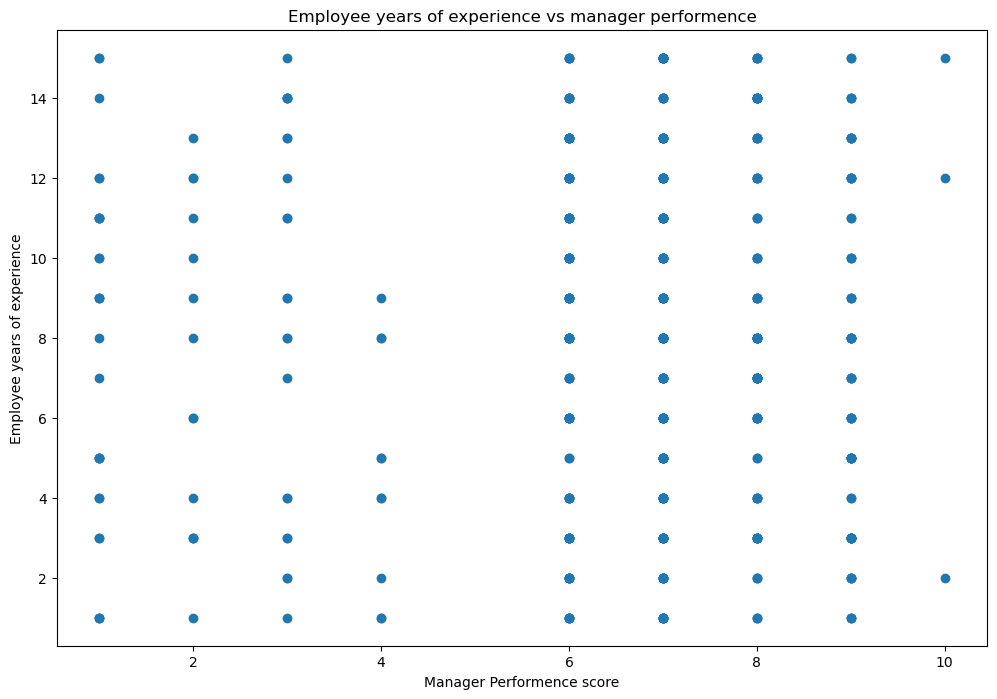

In [1106]:
plt.figure(figsize=(12,8))
plt.scatter(emp_years_vs_manager['performance_score'], emp_years_vs_manager['years_of_experience'])
plt.title('Employee years of experience vs manager performence')
plt.xlabel('Manager Performence score')
plt.ylabel('Employee years of experience')
plt.show()

The Data does not suggest a correlation between employees years of experience and managers performence. its almost evenly spread.

BONUS- 1. The company started in September 2022 - September 2023 a
hiring campaign in the USA R&D positions.
Was that campaign effective and managed to hire significantly new
employees?
Base your answer on valid calculations and visualizations of your
choice.

In [1113]:
emp_pos_bn = position_df_copy.merge(jobs_df_copy[['job_id', 'department']], on='job_id', how='left')
emp_pos_bn
#emp_pos_jobs_bn = emp_pos.merge(jobs_df_copy[['job_id', 'department']], on='job_id', how='left')
#emp_pos_jobs_bn

,position_id,employee_id,job_id,position_location,starting_date,performance_score,department
0,1,331,17.0,Germany,2020-04-05,8.0,IT & Networking
1,2,345,9.0,United States,2022-07-11,8.0,Design
2,3,51,20.0,Spain,2023-10-19,8.0,Data & Analytics
3,4,430,21.0,Singapore,2023-03-26,7.0,Data & Analytics
4,5,127,7.0,Israel,2020-09-15,8.0,Design
...,...,...,...,...,...,...,...
864,995,493,22.0,United States,1970-01-01,7.0,Data & Analytics
865,997,117,15.0,Argentina,2020-06-29,5.0,IT & Networking
866,998,25,1.0,France,1970-01-01,7.0,R&D
867,999,7,21.0,Argentina,2022-08-24,6.0,Data & Analytics


In [1123]:
emp_pos_bn = emp_pos_bn[emp_pos_bn['starting_date'] != pd.to_datetime('1970-01-01')]
emp_pos_bn

,position_id,employee_id,job_id,position_location,starting_date,performance_score,department
0,1,331,17.0,Germany,2020-04-05,8.0,IT & Networking
1,2,345,9.0,United States,2022-07-11,8.0,Design
2,3,51,20.0,Spain,2023-10-19,8.0,Data & Analytics
3,4,430,21.0,Singapore,2023-03-26,7.0,Data & Analytics
4,5,127,7.0,Israel,2020-09-15,8.0,Design
...,...,...,...,...,...,...,...
862,993,253,24.0,Argentina,2023-07-15,6.0,Data & Analytics
863,994,247,28.0,United States,2023-12-06,9.0,Marketing
865,997,117,15.0,Argentina,2020-06-29,5.0,IT & Networking
867,999,7,21.0,Argentina,2022-08-24,6.0,Data & Analytics


In [1129]:
emp_pos_bn_df = emp_pos_bn.groupby('starting_date')['department'].size().reset_index(name='amount_joined')
emp_pos_bn_df

,starting_date,amount_joined
0,2020-01-01,1
1,2020-01-03,1
2,2020-01-05,1
3,2020-01-06,1
4,2020-01-09,2
...,...,...
599,2023-12-23,1
600,2023-12-24,2
601,2023-12-26,1
602,2023-12-29,1


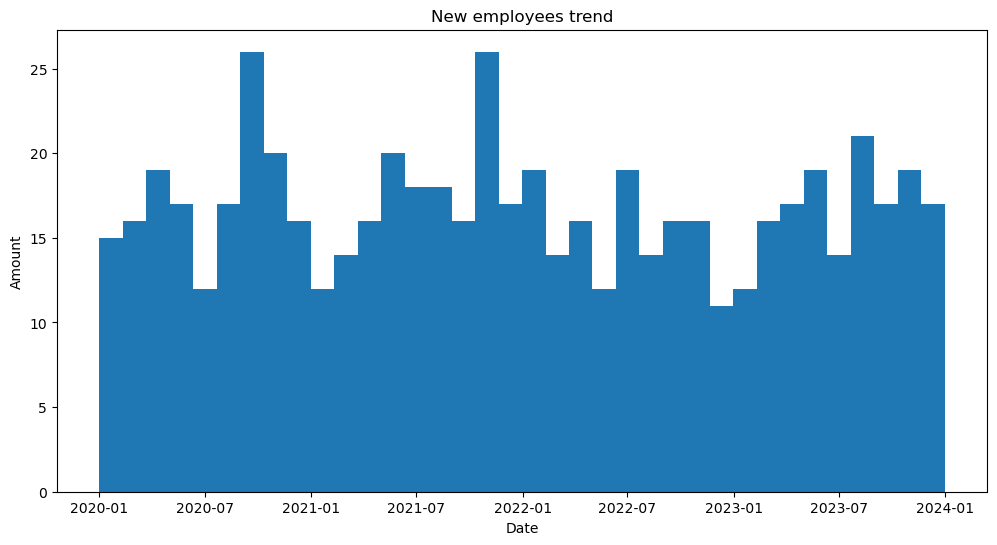

In [1147]:
plt.figure(figsize=(12,6))
plt.hist(emp_pos_bn_df['starting_date'], bins=36)
plt.title('New employees trend')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

Between September 2022 and septermber 2023 there hasnt been a major increase in new hires. stayed pretty consistant.

2. During the year 2023, The company management decided to hire
only managers with at least 10 years of experience to their R&D
positions. Investigate the data and decide if the company hiring
team successfully implemented the management decision.
Show your calculations you based your decision on in the answer.

In [1150]:
manager_10_year = position_df_copy.merge(employees_df_copy[['employee_id', 'manager_id']], on='employee_id')
manager_10_year = manager_10_year.merge(managers_df_copy[['manager_id', 'years_of_experience']], on='manager_id')
manager_10_year = manager_10_year.merge(jobs_df_copy[['job_id', 'department']], on='job_id')
manager_10_year

,position_id,employee_id,job_id,position_location,starting_date,performance_score,manager_id,years_of_experience,department
0,1,331,17.0,Germany,2020-04-05,8.0,81.0,6.0,IT & Networking
1,2,345,9.0,United States,2022-07-11,8.0,67.0,29.0,Design
2,3,51,20.0,Spain,2023-10-19,8.0,22.0,11.0,Data & Analytics
3,4,430,21.0,Singapore,2023-03-26,7.0,43.0,13.0,Data & Analytics
4,5,127,7.0,Israel,2020-09-15,8.0,9.0,16.0,Design
...,...,...,...,...,...,...,...,...,...
767,994,247,28.0,United States,2023-12-06,9.0,70.0,4.0,Marketing
768,995,493,22.0,United States,1970-01-01,7.0,88.0,16.0,Data & Analytics
769,997,117,15.0,Argentina,2020-06-29,5.0,5.0,28.0,IT & Networking
770,998,25,1.0,France,1970-01-01,7.0,21.0,6.0,R&D


In [1156]:
rd_2023_df = manager_10_year[(manager_10_year['department'] == 'R&D') & (manager_10_year['starting_date'].dt.year == 2023)]
rd_2023_df
rd_less_df = rd_2023_df[rd_2023_df['years_of_experience'] < 10]
rd_less_df

,position_id,employee_id,job_id,position_location,starting_date,performance_score,manager_id,years_of_experience,department
110,150,500,2.0,Brazil,2023-02-12,3.0,66.0,9.0,R&D
240,315,49,4.0,Germany,2023-05-20,8.0,59.0,8.0,R&D
315,405,188,4.0,Japan,2023-08-10,8.0,31.0,6.0,R&D
353,448,450,2.0,Japan,2023-02-02,9.0,66.0,9.0,R&D
401,512,378,3.0,Israel,2023-09-16,6.0,68.0,8.0,R&D
471,608,115,2.0,Israel,2023-09-09,8.0,59.0,8.0,R&D
560,724,300,4.0,Germany,2023-11-17,9.0,66.0,9.0,R&D
594,767,283,3.0,Italy,2023-05-03,8.0,21.0,6.0,R&D


In [1164]:
print(f"total R&D positions in 2023: {len(rd_2023_df)}")
print(f"hiring less than 10 years: {len(rd_less_df)}")
print("the hiring team did not fully implement the new policy")

total R&D positions in 2023: 40
hiring less than 10 years: 8
the hiring team did not fully implement the new policy
